In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import svm
from scipy.io import loadmat
from sklearn.metrics import classification_report


In [2]:
def get_data(str):
    path = './ex6_data/{}'.format(str)
    
    return loadmat(path)

In [3]:
data1 = get_data('ex6data1.mat')
X = data1['X']
y = data1['y']
df = pd.DataFrame({
    'X1':X[:,0],
    'X2':X[:,1],
    'y':y[:,0]
})
pos = df[df['y']==1]
neg = df[df['y']==0]

In [4]:
X.shape , y[:,0].shape

((51, 2), (51,))

In [5]:
def plotData():
    plt.plot(pos['X1'],pos['X2'],'b.',label='pos')
    plt.plot(neg['X1'],neg['X2'],'r.',label='neg')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc=3)

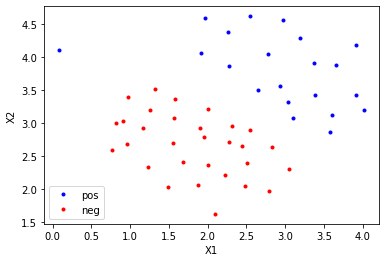

In [6]:
plotData()

In [7]:
def plot_bounder(ctf, X):
    x_min,x_max = X[:,0].min()*1.2, X[:,0].max()*1.2
    y_min,y_max = X[:,1].min()*1.2, X[:,1].max()*1.2

    xx = np.linspace(x_min, x_max, 500)
    yy = np.linspace(y_min, y_max, 500)

    xx, yy = np.meshgrid(xx,yy)
    Z= ctf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx,yy,Z)

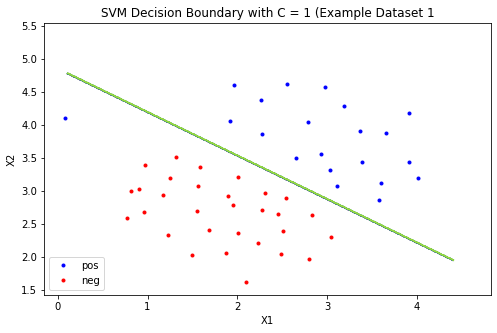

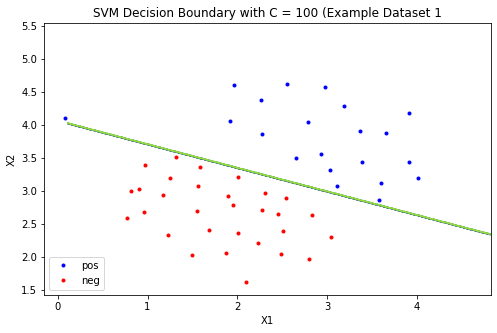

In [17]:
for c in [1,100]:
    modal = svm.SVC(c, kernel='linear')
    ctf = modal.fit(X, y)
    plt.figure(figsize=(8,5))
    plotData()
    plt.title('SVM Decision Boundary with C = {} (Example Dataset 1'.format(c))
    plot_bounder(ctf, X)

# Example Dataset 2

In [9]:
mat = loadmat('./ex6_data/ex6data2.mat')
X2 = mat['X']
y2 = mat['y']
X2.shape, y2.shape

((863, 2), (863, 1))

In [10]:
def plotData2(X,y):
    data = np.c_[X,y]
    df = pd.DataFrame(data)
    pos = df[df[2] == 1]
    neg = df[df[2] == 0]

    plt.plot(pos[0],pos[1],'b.')
    plt.plot(neg[0],neg[1],'r.')
    # return neg


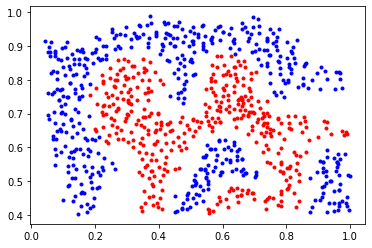

In [11]:
plotData2(X2,y2)

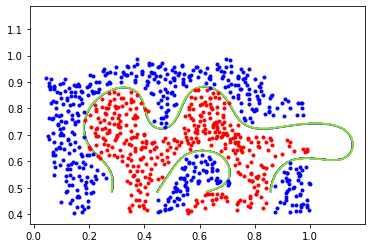

In [12]:
sigma = 0.1
gamma = np.power(sigma,-2.)/2
model = svm.SVC(C=1, kernel='rbf', gamma=gamma)
ctf = model.fit(X2, y2)
plotData2(X2, y2)
plot_bounder(ctf, X2)



# Example Dataset 3

In [13]:
mat3 = loadmat('./ex6_data/ex6data3.mat')
X3 = mat3['X']
y3 = mat3['y']
Xval3 = mat3['Xval']
yval3 = mat3['yval']

In [14]:
X3.shape,y3.shape,Xval3.shape,yval3.shape

((211, 2), (211, 1), (200, 2), (200, 1))

Text(0.5, -0.2, 'Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)')

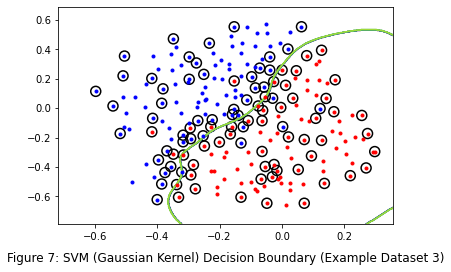

In [85]:
plotData2(X3,y3)
C=1
sigma = 0.1
gamma = np.power(sigma,-2.)/2
modal = svm.SVC(C=C,kernel='rbf', gamma=gamma)
ctf = modal.fit(X3, y3)
plot_bounder(ctf, X3)
#在图中标记出 支持向量 的位置
plt.scatter(ctf.support_vectors_[:,0],ctf.support_vectors_[:,1],s=100,linewidths=1.5,facecolors='None', edgecolors='k')
plt.title('Figure 7: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 3)',y=-0.2)

In [86]:
ctf.predict([[-0.4,0.4]])

array([1], dtype=uint8)

In [87]:
def accuracy(ctf, X, y):
    yy = ctf.predict(X)
    return classification_report(yy,y)

In [88]:
print(accuracy(ctf, Xval3, yval3))

precision    recall  f1-score   support

           0       0.96      0.97      0.97       112
           1       0.97      0.95      0.96        88

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



# Spam Classification 